##(3) Taking any two classes from the above data, add labels to them (0 or 1) and create a new csv file. Split the data into Train / Test set as 70/30.

(a) Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs.

(b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library.  (10 marks)

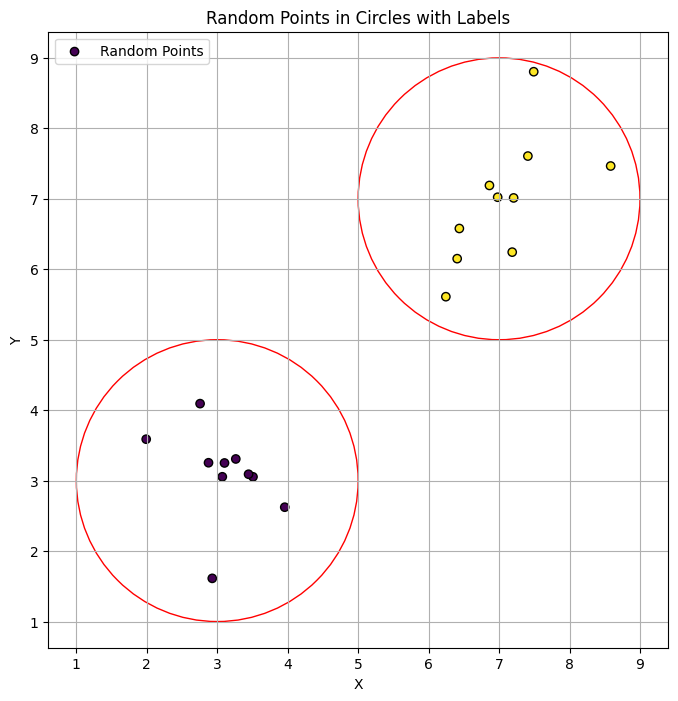

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Define parameters for circles
circles = [
    {'center': (3, 3), 'radius': 2, 'label': 0},
    {'center': (7, 7), 'radius': 2, 'label': 1}
]

# Generate random points in circles
num_points = 10
points = []

for circle in circles:
    center = circle['center']
    radius = circle['radius']
    label = circle['label']
    for _ in range(num_points):
        theta = np.random.uniform(0, 2 * np.pi)
        r = np.random.uniform(0, radius)
        x = center[0] + r * np.cos(theta)
        y = center[1] + r * np.sin(theta)
        points.append((x, y, label))

# Plot the points
plt.figure(figsize=(8, 8))
for circle in circles:
    plt.gca().add_patch(plt.Circle(circle['center'], circle['radius'], color='r', fill=False))
x_values = [point[0] for point in points]
y_values = [point[1] for point in points]
labels = [point[2] for point in points]
plt.scatter(x_values, y_values, c=labels, cmap='viridis', label='Random Points', edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points in Circles with Labels')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

In [ ]:
# Write data to CSV file
with open('labeled_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['X', 'Y', 'Label'])
    writer.writerows(points)

In [ ]:
# Load labeled data from CSV file
with open('labeled_data.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    labeled_data = [tuple(map(float, row)) for row in reader]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and labels (y)
X = np.array([[row[0], row[1]] for row in labeled_data])
y = np.array([row[2] for row in labeled_data])

# Manually normalize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Add bias term to X_normalized
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Split data into training and testing sets using sklearn's train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

print('X training after normalization : \n',X_train)
print('\n\nY training : \n',y_train)

print('\n\nX testing after normalization : \n',X_test)
print('\n\nY testing : \n',y_test)

X training after normalization : 
 [[ 1.          0.79601161  1.07180168]
 [ 1.         -0.90590808 -0.90488423]
 [ 1.          1.21891196  0.76351252]
 [ 1.          1.09926859  0.28383431]
 [ 1.          0.53401495  1.13031506]
 [ 1.         -0.62065783 -0.8752547 ]
 [ 1.         -1.7374818  -0.47781825]
 [ 1.          0.75222755  1.28442665]
 [ 1.         -0.16853884 -0.6194328 ]
 [ 1.          1.14589177  0.39252542]
 [ 1.         -1.46472634 -0.69423912]
 [ 1.          1.07507778  1.20603517]
 [ 1.          0.8529936   0.87222926]
 [ 1.         -0.97566721 -0.86238994]]


Y training : 
 [1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.]


X testing after normalization : 
 [[ 1.         -0.78743696 -1.22627691]
 [ 1.          0.62842913  0.75458418]
 [ 1.          1.30506583  1.62605453]
 [ 1.         -1.02740206 -1.47572412]
 [ 1.         -0.96301464 -0.97672141]
 [ 1.         -0.75705901 -1.27257733]]


Y testing : 
 [0. 1. 1. 0. 0. 0.]


In [ ]:
# Implement logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # to prevent log(0) error
    cost = (1/m) * ((-y).T @ np.log(h + epsilon) - (1 - y).T @ np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for _ in range(num_iters):
        theta -= (alpha / m) * (X.T @ (sigmoid(X @ theta) - y))
        cost = compute_cost(X, y, theta)
        J_history.append(cost)
    return theta, J_history

def logistic_regression(X, y, alpha, num_iters):
    theta = np.zeros(X.shape[1])
    theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
    return theta , J_history

# Train logistic regression model
theta , J_history = logistic_regression(X_train, y_train, alpha=0.01, num_iters=1000)

print("Shape of theta:", theta.shape)
print('Values of Theta : ',theta)
print('After 1000 iteration , cost function value is : ',J_history[-1])

Shape of theta: (3,)
Values of Theta :  [0.07434027 1.54317108 1.39434046]
After 1000 iteration , cost function value is :  0.08363457777533415


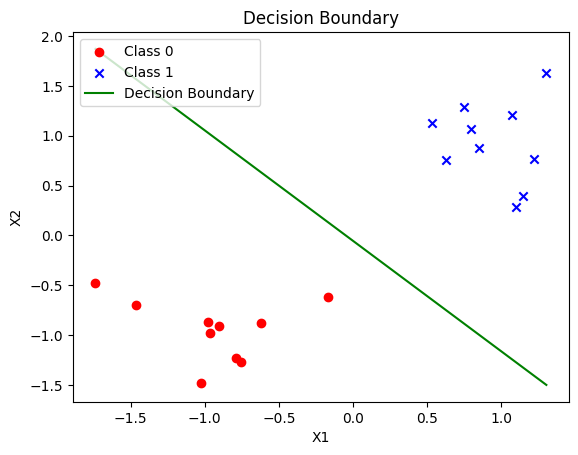

In [ ]:
# Plot decision boundary
plt.scatter(X_normalized[y == 0][:, 1], X_normalized[y == 0][:, 2], c='r', marker='o', label='Class 0')
plt.scatter(X_normalized[y == 1][:, 1], X_normalized[y == 1][:, 2], c='b', marker='x', label='Class 1')

x1_boundary = np.array([np.min(X_normalized[:, 1]), np.max(X_normalized[:, 1])])
x2_boundary = -(theta[0] + theta[1] * x1_boundary) / theta[2]
plt.plot(x1_boundary, x2_boundary, color='green', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Predict function
def predict(X, theta):
    predictions = sigmoid(X @ theta)
    return predictions >= 0.5

# Predictions on test data
y_pred_test = predict(X_test, theta)
print('Actual classes for testing points : ',y_test)
print('Predicted classes for testing points : ',y_pred_test)

Actual classes for testing points :  [0. 1. 1. 0. 0. 0.]
Predicted classes for testing points :  [False  True  True False False False]


In [ ]:
# Evaluation metrics
def evaluate(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * precision * recall / (precision + recall)
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return precision, recall, f1_score, accuracy


# Evaluate metrics
precision_test, recall_test, f1_score_test, accuracy_test = evaluate(y_test, y_pred_test)
print("Precision on test data:", precision_test)
print("Recall on test data:", recall_test)
print("F1 Score on test data:", f1_score_test)
print("Accuracy on test data:", accuracy_test)

Precision on test data: 1.0
Recall on test data: 1.0
F1 Score on test data: 1.0
Accuracy on test data: 1.0
